<a href="https://colab.research.google.com/github/OutAway/PhleboVision/blob/main/vggnet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!gdown 183PvdHbFQgUO6cqaDzuOkTGcKUWlMtj3
!unzip -o /content/dataset.zip

Downloading...
From: https://drive.google.com/uc?id=183PvdHbFQgUO6cqaDzuOkTGcKUWlMtj3
To: /content/dataset.zip
100% 26.9M/26.9M [00:00<00:00, 151MB/s]
Archive:  /content/dataset.zip
  inflating: dataset/acantopharynx/Project_New collection001_Series001_AdjustClr001_z010_ch00_SV.jpg  
  inflating: dataset/acantopharynx/Project_New collection001_Series002_AdjustClr002_z070_ch00_SV.jpg  
  inflating: dataset/acantopharynx/Project_New collection001_Series002_AdjustClr002_z071_ch00_SV.jpg  
  inflating: dataset/acantopharynx/Project_New collection001_Series003_AdjustClr002_z26_ch00_SV.jpg  
  inflating: dataset/acantopharynx/Project_New collection001_Series003_AdjustClr002_z27_ch00_SV.jpg  
  inflating: dataset/acantopharynx/Project_New collection001_Series005_AdjustClr001_z43_ch00_SV.jpg  
  inflating: dataset/acantopharynx/Project_New collection001_Series005_AdjustClr001_z44_ch00_SV.jpg  
  inflating: dataset/acantopharynx/Project_New collection001_Series006_AdjustClr001_z29_ch00_SV.jpg  


# VGGNET With Keras on Custom Dataset

In [2]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.imagenet_utils import _obtain_input_shape ## keras =< 2.2.0
from keras.utils import get_source_inputs


In [3]:
def VGGupdated(input_tensor=None,classes=2):

    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

root_dir = 'dataset'  # you need to define this
dataset_cls = os.listdir(root_dir)

class_types = os.listdir(root_dir)
print (class_types)  # what kinds of rooms are in this dataset
print("Classes: ", len(dataset_cls))
for entry in class_types:
    num_files = len(os.listdir(os.path.join(root_dir, entry)))
    print(f"{entry}: {num_files} entries")

entry_files = []  # I've changed the variable name to avoid confusion

for entry in class_types:
    # Get all the file names
    all_entry = os.listdir(os.path.join(root_dir, entry))

    # Add them to the list
    for file in all_entry:
        entry_files.append((entry, os.path.join(root_dir, entry, file)))
#print(entry_files)  # this variable 'rooms' is not defined anywhere








['acantopharynx', 'atroclavata']
Classes:  2
acantopharynx: 20 entries
atroclavata: 21 entries


In [5]:
model = VGGupdated(classes = len(dataset_cls)) # bedroom and diningroom
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:

# Build a dataframe
phlebo_df = pd.DataFrame(data=entry_files, columns=['species', 'file'])
print(phlebo_df.head())
print(phlebo_df.tail())


         species                                               file
0  acantopharynx  dataset/acantopharynx/Project_New collection00...
1  acantopharynx  dataset/acantopharynx/Project_New collection00...
2  acantopharynx  dataset/acantopharynx/Project_New collection00...
3  acantopharynx  dataset/acantopharynx/Project_New collection00...
4  acantopharynx  dataset/acantopharynx/Project_New collection00...
        species                                               file
36  atroclavata  dataset/atroclavata/Mi atroclavata IA_atro_4_S...
37  atroclavata  dataset/atroclavata/Mi atroclavata IA_atro_5_S...
38  atroclavata  dataset/atroclavata/Mi atroclavata IA_atro_2_S...
39  atroclavata  dataset/atroclavata/Mi atroclavata IA_atro_2_S...
40  atroclavata  dataset/atroclavata/Mi atroclavata IA_atro_4_S...


In [7]:

# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(phlebo_df))

room_count = phlebo_df['species'].value_counts()

print("rooms in each category: ")
print(room_count)


Total number of rooms in the dataset:  41
rooms in each category: 
atroclavata      21
acantopharynx    20
Name: species, dtype: int64


In [8]:


import cv2
path = root_dir + '/'


im_size = 300

images = []
labels = []

for i in dataset_cls:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

#print(images)
#print(labels)

In [9]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape


(41, 300, 300, 3)

In [10]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=phlebo_df['species'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [11]:
from sklearn.preprocessing import OneHotEncoder
y=y.reshape(-1,1)
onehotencoder = OneHotEncoder()  # No need to specify categorical_features
Y= onehotencoder.fit_transform(y)
Y.shape  #(40, 2)

(41, 2)

In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#import tensorflow as tf


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# flatten the labels if they're not already flat
train_y = train_y.toarray()
test_y = test_y.toarray()




# Convert only if they are in SparseTensor format
if isinstance(train_x, tf.SparseTensor):
    train_x = tf.sparse.to_dense(train_x)
if isinstance(train_y, tf.SparseTensor):
    train_y = tf.sparse.to_dense(train_y)
if isinstance(test_x, tf.SparseTensor):
    test_x = tf.sparse.to_dense(test_x)
if isinstance(test_y, tf.SparseTensor):
    test_y = tf.sparse.to_dense(test_y)

# inspect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(38, 300, 300, 3)
(38, 2)
(3, 300, 300, 3)
(3, 2)


# Training

In [13]:
model.fit(train_x, train_y, epochs = 1, batch_size = 32)

2/2 [==============================] - 179s 32s/step - loss: 0.7213 - accuracy: 0.5263


In [14]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
#print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 3s 3s/step - loss: 2.6134 - accuracy: 0.6667
Loss = 2.6134159564971924


# Take input from User and Classify that image

Test from default database

In [16]:
!gdown 17wYgS56MUv9ZAkr3KY_wqurvJbTY6Kdv
!unzip -o /content/test.zip

Downloading...
From: https://drive.google.com/uc?id=17wYgS56MUv9ZAkr3KY_wqurvJbTY6Kdv
To: /content/test.zip
100% 5.17M/5.17M [00:00<00:00, 96.9MB/s]
Archive:  /content/test.zip
  inflating: test/jj.jpg             
  inflating: test/Untitled105.jpg    
  inflating: test/Untitled107.jpg    
  inflating: test/Untitled809.jpg    
  inflating: test/Untitled95.jpg     


In [22]:
test_path = 'test'
img_size = (300,300)
files = os.listdir(test_path)

Upload own file

Saving Untitled167.jpg to Untitled167 (2).jpg
Saving Untitled168.jpg to Untitled168 (2).jpg
Saving Untitled169.jpg to Untitled169 (2).jpg
User uploaded file "Untitled167 (2).jpg" with length 637960 bytes
User uploaded file "Untitled168 (2).jpg" with length 645613 bytes
User uploaded file "Untitled169 (2).jpg" with length 645613 bytes


Button(description='Next Image', style=ButtonStyle())

Input image shape: (1, 300, 300, 3)
1/1 [==============================] - 1s 1s/step


[[1. 0.]]


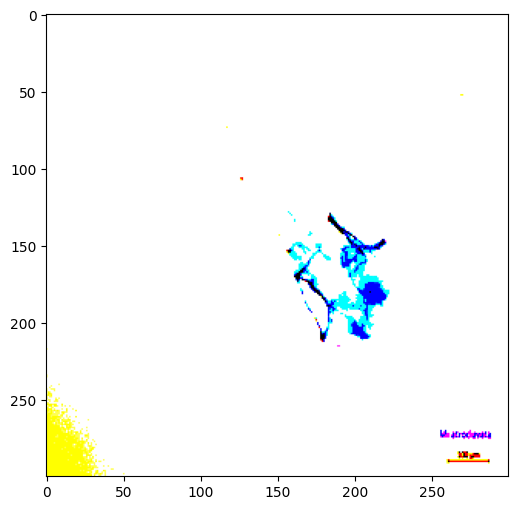

Input image shape: (1, 300, 300, 3)
1/1 [==============================] - 1s 1s/step


[[1. 0.]]


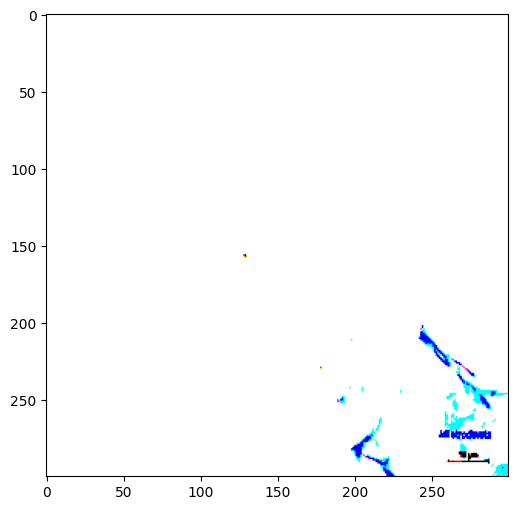

In [38]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from IPython.display import display
import ipywidgets as widgets

img_size = (300,300)

# Load your model here.
# model = ...

dir_path = 'uploaded'
os.makedirs(dir_path, exist_ok=True)

def load_and_process_image(img_path):
    img = Image.open(img_path)
    img = img.resize(img_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    print('Input image shape:', img.shape)
    return img

def on_button_clicked(b):
    global file_index
    plt.figure(figsize=(6,6))
    file_path = os.path.join(dir_path, uploaded_files[file_index])
    img = load_and_process_image(file_path)

    # Predict on the current image
    print(model.predict(img))

    # Display the image
    plt.imshow(np.squeeze(img, axis=0))
    plt.show()

    file_index += 1
    if file_index >= len(uploaded_files):
        file_index = 0

uploaded = files.upload()  # This will prompt you to upload a file.

uploaded_files = []

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    # Save the uploaded file to the 'uploaded' directory
    with open(os.path.join(dir_path, fn), 'wb') as f:
        f.write(uploaded[fn])
        uploaded_files.append(fn)

file_index = 0

button = widgets.Button(description="Next Image")
display(button)
button.on_click(on_button_clicked)



Button(description='Next Image', style=ButtonStyle())

Input image shape: (1, 300, 300, 3)
1/1 [==============================] - 1s 1s/step
[[1. 0.]]


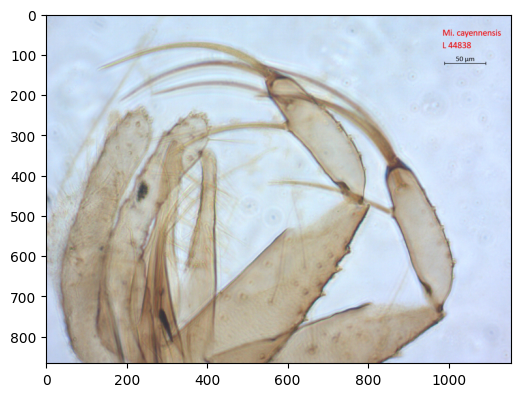

Input image shape: (1, 300, 300, 3)
1/1 [==============================] - 1s 1s/step
[[1. 0.]]


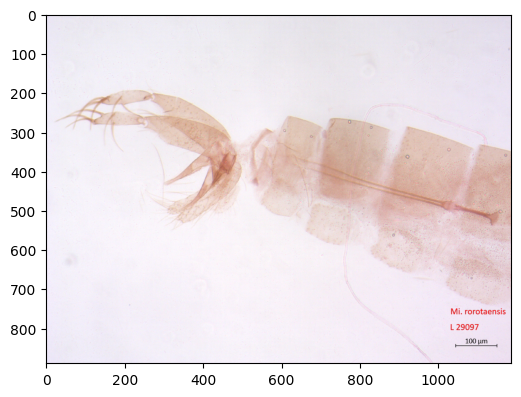

Input image shape: (1, 300, 300, 3)
1/1 [==============================] - 2s 2s/step
[[1. 0.]]


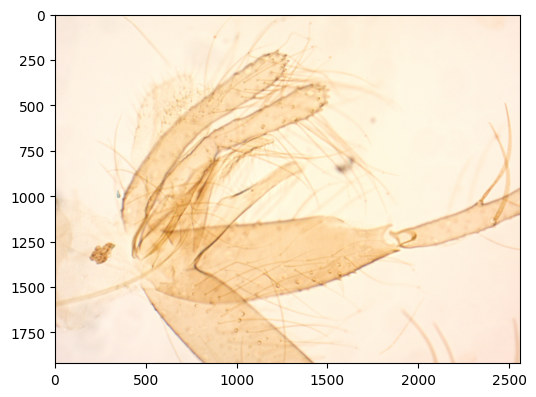

In [36]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from matplotlib.pyplot import imread, imshow
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt

test_path = 'test'
files = os.listdir(test_path)
file_index = 0

# Load and process the image
def load_and_process_image(file_path):
    img = load_img(file_path, target_size=(img_size))  # adjust the target size to the required dimensions
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print('Input image shape:', x.shape)
    return x

def on_button_clicked(b):
    global file_index
    plt.figure(figsize=(6,6))
    file_path = os.path.join(test_path, files[file_index])
    x = load_and_process_image(file_path)

    # Predict on the current image
    print(model.predict(x))

    # Display the image
    my_image = imread(file_path)
    imshow(my_image)
    plt.show()

    file_index += 1
    if file_index >= len(files):
        file_index = 0


button = widgets.Button(description="Next Image")
display(button)
button.on_click(on_button_clicked)